#**Kitasabi.com (Kelompok 5)**


*   M Choiril Iman
*   Yehezkiel Novianto

*   Ahmad Reza
*   Celestial Randy


*   Risca Naquitasia
*   Sonia Epifany Sandah

*   Oky Hariawan






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('hotel_booking.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# initialize df_clean
df_clean = df.copy()

In [ ]:
#Numeric
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()

#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float)].columns.tolist()

In [ ]:
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

# **Handle missing values**

In [ ]:
#Checking Missing Values
df_clean.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


Ditemukan 4 kolom yang memiliki missing values:

*   company
*   agent
*   country
*   children

Treatment:

*   Kolom `children` karena hanya memiliki 4 baris data yang kosong maka missing value tersebut akan di hapus
*   Kolom `agent` karena merupakan ID maka nilai akan di set 0 untuk data yang tidak memiliki ID dan 1 untuk data yang memiliki ID.
*   Kolom `company` karena banyak missing value (94%) maka feature `company` dapat di drop
*   Kolom `country` karena sebagian besar nilainya adalah PRT dan missing value rationya kecil, maka missing value tersebut akan diisi dengan nilai PRT


In [ ]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

In [ ]:
#Change value agent to 0 and 1
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'].value_counts()

1    103048
0     16338
Name: agent, dtype: int64

In [ ]:
df_clean.shape

(119386, 36)

In [ ]:
#Drop feature company
df_clean.drop(columns=['company'], inplace = True)
df_clean.shape

(119386, 35)

In [ ]:
#Fill NaN value in country with the value of mode
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)
df_clean['country'].value_counts()

PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# **Handle duplicated data**

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.duplicated(subset=['name', 'email', 'phone-number', 'credit_card']).sum()

0

Tidak ditemukan adanya duplicated values

# **Handle outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

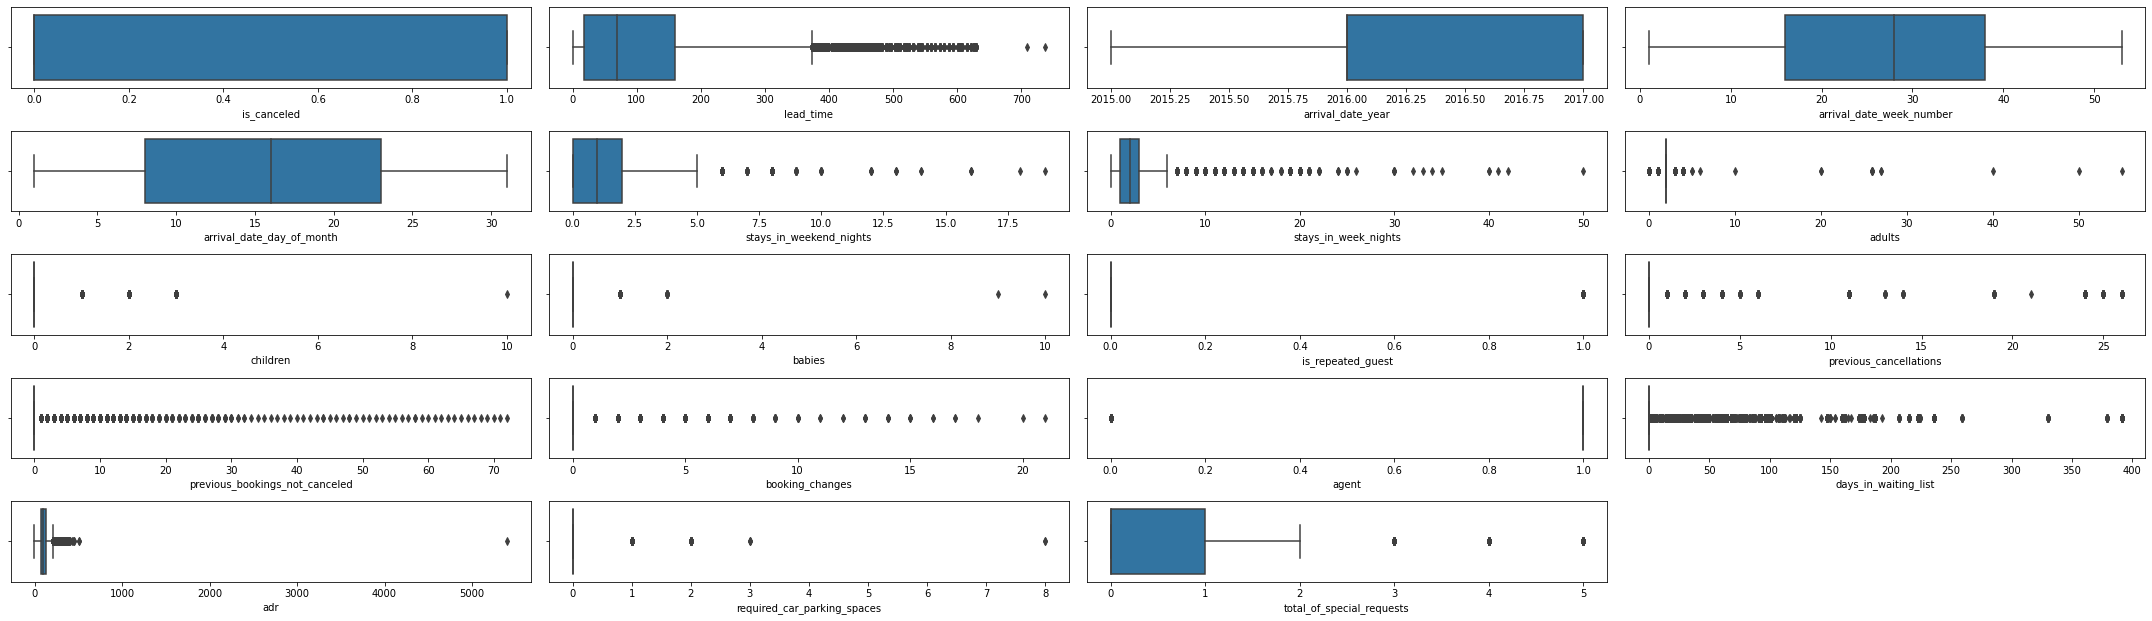

In [ ]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()


*   Dapat terlihat jika dalam data ini memiliki banyak outliers
*   Dalam hal ini kami akan menangani outlier seperti keterangan di bawah


## Lead Time Feature

In [ ]:
#Cek nilai outlier
Q1 = df_clean['lead_time'].quantile(0.25)
Q3 = df_clean['lead_time'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-195.0, 373.0, 18.0, 160.0)

In [ ]:
df_clean.loc[(df_clean.lead_time > high_limit,'lead_time')] = high_limit
#Karena lead time dibatasi hanya 1 tahun

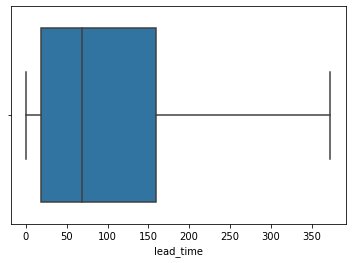

In [ ]:
sns.boxplot(x = df_clean.lead_time)

## Stays in Weekend Nights

In [ ]:
#Cek nilai Oulier
Q1 = df_clean['stays_in_weekend_nights'].quantile(0.25)
Q3 = df_clean['stays_in_weekend_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-3.0, 5.0, 0.0, 2.0)

In [ ]:
df_clean.stays_in_weekend_nights.value_counts()

0     51996
2     33307
1     30625
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
df_clean.loc[(df_clean.stays_in_weekend_nights > high_limit,'stays_in_weekend_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari (modus = 0 diabaikan)

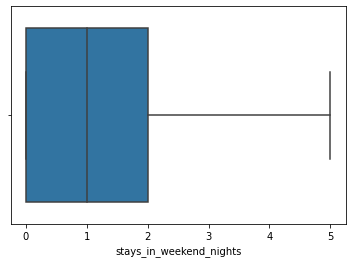

In [ ]:
sns.boxplot(x = df_clean.stays_in_weekend_nights)

## **Stays in Week Nights**

In [ ]:
Q1 = df_clean['stays_in_week_nights'].quantile(0.25)
Q3 = df_clean['stays_in_week_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-2.0, 6.0, 1.0, 3.0)

In [ ]:
df_clean.stays_in_week_nights.value_counts()

2     33682
1     30310
3     22258
5     11076
4      9563
0      7644
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
df_clean.loc[(df_clean.stays_in_week_nights > high_limit,'stays_in_week_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari 

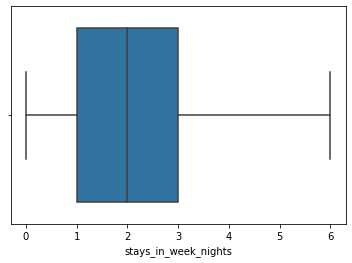

In [ ]:
sns.boxplot(x = df_clean.stays_in_week_nights)

## **Adults**

In [ ]:
Q1 = df_clean['adults'].quantile(0.25)
Q3 = df_clean['adults'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
df_clean.adults.value_counts()

2     89677
1     23027
3      6201
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
#Karena ada nilai 0 (Customer tidak boleh anak kecil atau babies maka nilai 0 diganti 1
df_clean.loc[(df_clean.adults == 0,'adults')] = 1

In [ ]:
df_clean.adults.value_counts()

2     89677
1     23430
3      6201
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

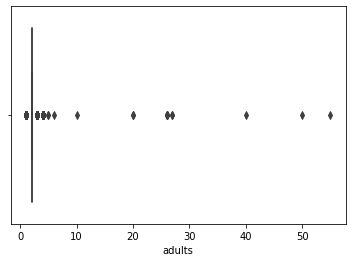

In [ ]:
sns.boxplot(x = df_clean.adults)

## **Children**

In [ ]:
Q1 = df_clean['children'].quantile(0.25)
Q3 = df_clean['children'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df_clean.loc[(df_clean.children ==10,'children')] = 3
#Karena kita anggap 10 anak case yg sangat spesial

In [ ]:
df_clean.children.value_counts()

0.0    110796
1.0      4861
2.0      3652
3.0        77
Name: children, dtype: int64

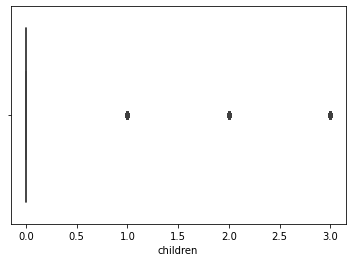

In [ ]:
sns.boxplot(x = df_clean.children)

## **Babies**

In [ ]:
Q1 = df_clean['babies'].quantile(0.25)
Q3 = df_clean['babies'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.babies.value_counts()

0     118469
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df_clean.loc[(df_clean.babies > 5,'babies')] = 2
#Karena kita anggap babies > 5 case spesial

In [ ]:
df_clean.babies.value_counts()

0    118469
1       900
2        17
Name: babies, dtype: int64

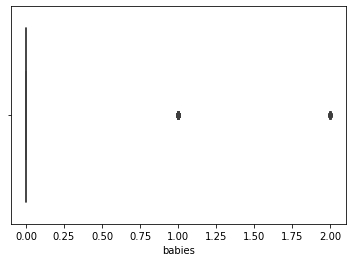

In [ ]:
sns.boxplot(x = df_clean.babies)

## **Previous Cancellations**

In [ ]:
Q1 = df_clean['previous_cancellations'].quantile(0.25)
Q3 = df_clean['previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.previous_cancellations.value_counts()

0     112902
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
df_clean.loc[(df_clean.previous_cancellations > 0,'previous_cancellations')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [ ]:
df_clean.previous_cancellations.value_counts()

0    112902
1      6484
Name: previous_cancellations, dtype: int64

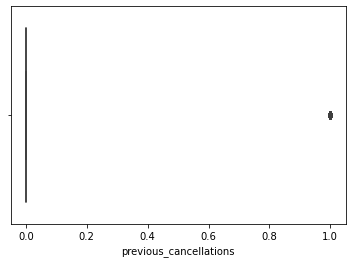

In [ ]:
sns.boxplot(x = df_clean.previous_cancellations)

## **Previous Bookings Not Cancelled**

In [ ]:
Q1 = df_clean['previous_bookings_not_canceled'].quantile(0.25)
Q3 = df_clean['previous_bookings_not_canceled'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.previous_bookings_not_canceled.value_counts()

0     115766
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [ ]:
df_clean.loc[(df_clean.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [ ]:
df_clean.previous_bookings_not_canceled.value_counts()

0    115766
1      3620
Name: previous_bookings_not_canceled, dtype: int64

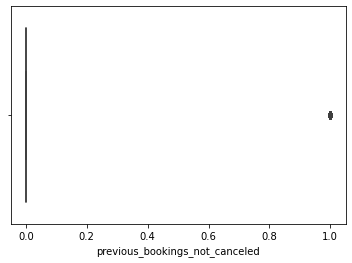

In [ ]:
sns.boxplot(x = df_clean.previous_bookings_not_canceled)

## **Booking Changes**

In [ ]:
Q1 = df_clean['booking_changes'].quantile(0.25)
Q3 = df_clean['booking_changes'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.booking_changes.value_counts()

0     101310
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [ ]:
df_clean.loc[(df_clean.booking_changes > 0,'booking_changes')] = 1
#Karena kita bagi hanya 2 keadaan pernah booking change atau tidak

In [ ]:
df_clean.booking_changes.value_counts()

0    101310
1     18076
Name: booking_changes, dtype: int64

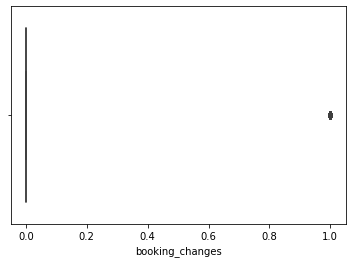

In [ ]:
sns.boxplot(x = df_clean.booking_changes)

## **Days in Waiting List**

In [ ]:
Q1 = df_clean['days_in_waiting_list'].quantile(0.25)
Q3 = df_clean['days_in_waiting_list'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.days_in_waiting_list.value_counts()

0      115688
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [ ]:
df_clean.loc[(df_clean.days_in_waiting_list > 1,'days_in_waiting_list')] = 1
#Karena kita bagi hanya 2 keadaan waiting list atau tidak

In [ ]:
df_clean.days_in_waiting_list.value_counts()

0    115688
1      3698
Name: days_in_waiting_list, dtype: int64

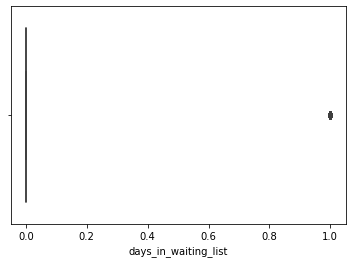

In [ ]:
sns.boxplot(x = df_clean.days_in_waiting_list)

## **ADR**

In [ ]:
Q1 = df_clean['adr'].quantile(0.25)
Q3 = df_clean['adr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-15.774999999999991, 211.065, 69.29, 126.0)

In [ ]:
df_clean.loc[(df_clean.adr > high_limit,'adr')] = high_limit

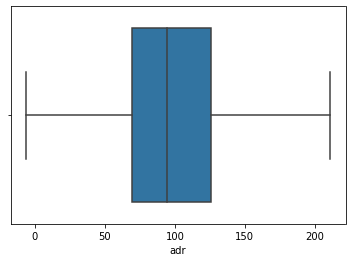

In [ ]:
sns.boxplot(x = df_clean.adr)

## **Required Car Parking Spaces**

In [ ]:
Q1 = df_clean['required_car_parking_spaces'].quantile(0.25)
Q3 = df_clean['required_car_parking_spaces'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [ ]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
df_clean.loc[(df_clean.required_car_parking_spaces > 1,'required_car_parking_spaces')] = 1
#Karena kita bagi hanya 2 keadaan butuh parkir atau tidak

In [ ]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7416
Name: required_car_parking_spaces, dtype: int64

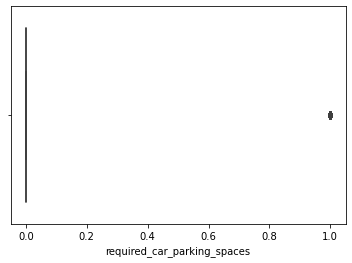

In [ ]:
sns.boxplot(x = df_clean.required_car_parking_spaces)

## **Total of Special Requests**

In [ ]:
Q1 = df_clean['total_of_special_requests'].quantile(0.25)
Q3 = df_clean['total_of_special_requests'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [ ]:
low_limit,high_limit,Q1,Q3

(-1.5, 2.5, 0.0, 1.0)

In [ ]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    12968
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
df_clean.loc[(df_clean.total_of_special_requests > high_limit,'total_of_special_requests')] = 2
#Karena nilai high limit adalah pecahan maka outlier kita jadikan angka terdekat

In [ ]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    15845
Name: total_of_special_requests, dtype: int64

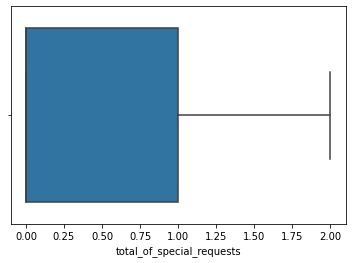

In [ ]:
sns.boxplot(x = df_clean.total_of_special_requests)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

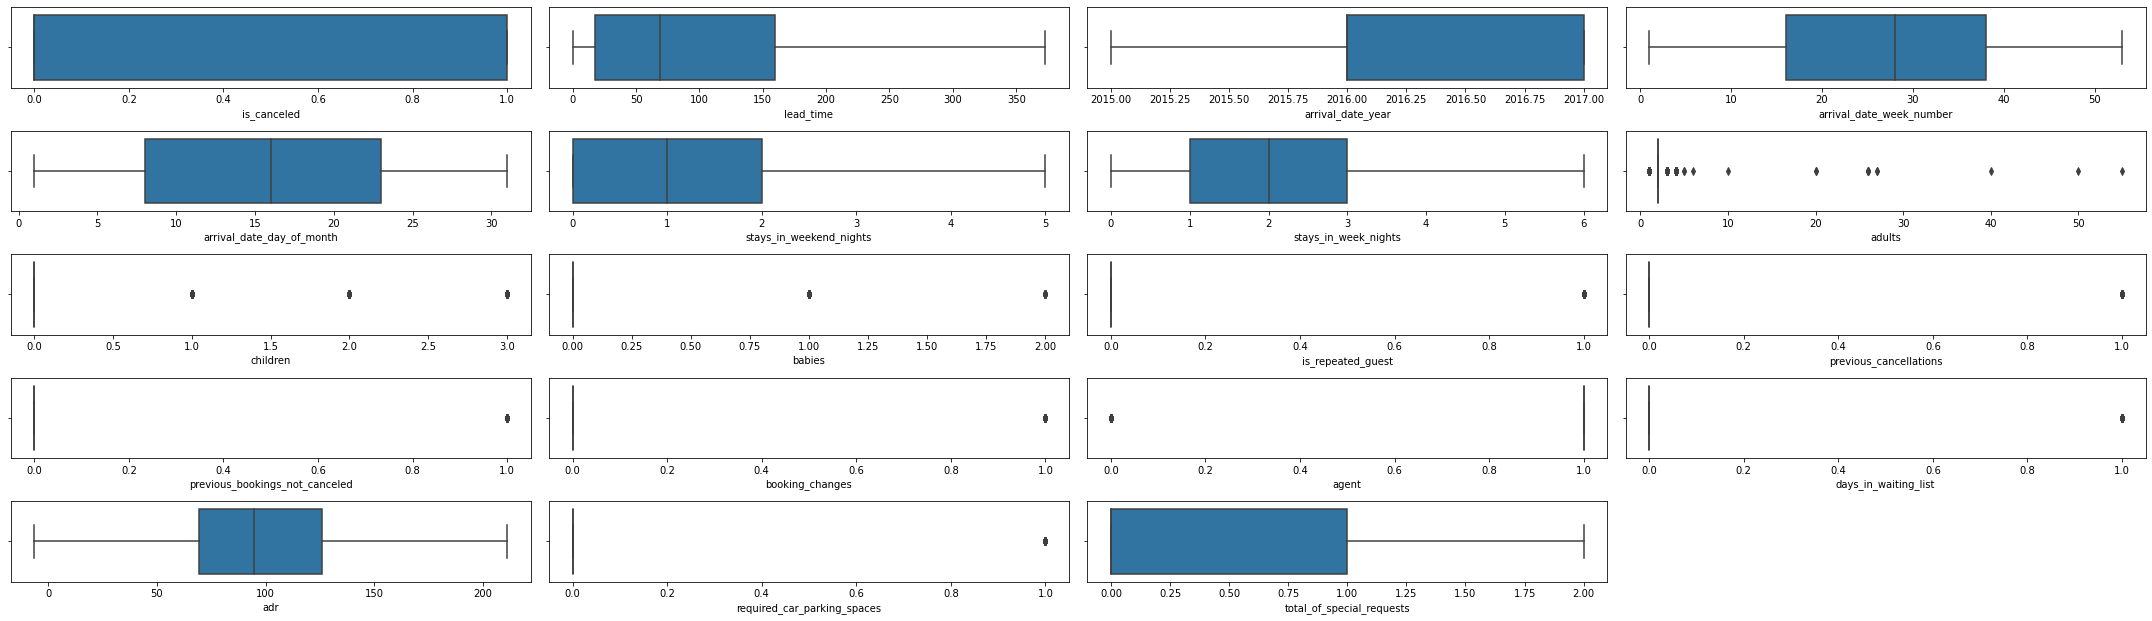

In [ ]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()

# **Feature transformation**

**Normalization**

> Normalized/re-scale kolom numerical yang memiliki angka variance tinggi guna mempermudah interpretasi beberapa model ML



In [ ]:
df_clean.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


is_canceled                           0.233205
lead_time                         10233.142643
arrival_date_year                     0.500494
arrival_date_week_number            185.105119
arrival_date_day_of_month            77.102158
stays_in_weekend_nights               0.902301
stays_in_week_nights                  1.966724
adults                                0.326374
children                              0.158101
babies                                0.008047
is_repeated_guest                     0.030895
previous_cancellations                0.051362
previous_bookings_not_canceled        0.029403
booking_changes                       0.128485
agent                                 0.118123
days_in_waiting_list                  0.030016
adr                                1996.974979
required_car_parking_spaces           0.058260
total_of_special_requests             0.513534
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_clean['lead_time_norm'] = MinMaxScaler().fit_transform(df_clean['lead_time'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_week_number_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_week_number'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_day_of_month_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_day_of_month'].values.reshape(len(df_clean), 1))
df_clean['adr_norm'] = MinMaxScaler().fit_transform(df_clean['adr'].values.reshape(len(df_clean), 1))

In [ ]:
df_clean[['lead_time_norm','arrival_date_week_number_norm','arrival_date_day_of_month_norm','adr_norm']].describe()

,lead_time_norm,arrival_date_week_number_norm,arrival_date_day_of_month_norm,days_in_waiting_list_norm,adr_norm
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.274082,0.503173,0.493285,0.030975,0.492270
std,0.271204,0.261641,0.292693,0.173251,0.205512
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048257,0.288462,0.233333,0.000000,0.347996
50%,0.184987,0.519231,0.500000,0.000000,0.464347
75%,0.428954,0.711538,0.733333,0.000000,0.608798
max,1.000000,1.000000,1.000000,1.000000,1.000000


# **Feature encoding**

Dilakukan treatment dengan Label Encoding untuk fitur hotel (karena ada 2 unique), reserved_room_type dan assigned_room_type (karena unique data nya ordinal). Selain itu juga menggunakan One Hot Encoding untuk fitur distribution_channel, deposit_type, customer_type, reservation_status dimana fitur tersebut memiliki nilai unique  lebih dari 2 dan tidak bersifat ordinal.

In [ ]:
#Label encoding
df_label = df_clean.copy()

mapping_hotel = {'City Hotel': 0, 
                 'Resort Hotel': 1}
df_label['hotel'] = df_label['hotel'].map(mapping_hotel)


mapping_reserved_room_type = {'A':0,
                              'B':1,
                              'C':2,
                              'D':3, 
                              'E':4,
                              'F':5,
                              'G':6,
                              'H':7,
                              'I':8,
                              'J':9,
                              'K':10,
                              'L':11}
df_label['reserved_room_type'] = df_label['reserved_room_type'].map(mapping_reserved_room_type)


mapping_assigned_room_type = {'A':0, 
                              'B':1,
                              'C':2,
                              'D':3, 
                              'E':4,
                              'F':5,
                              'G':6,
                              'H':7,
                              'I':8,
                              'J':9,
                              'K':10,
                              'L':11}
df_label['assigned_room_type'] = df_label['assigned_room_type'].map(mapping_assigned_room_type)


In [ ]:
df_label[['hotel', 'reserved_room_type','assigned_room_type']].head()

,hotel,reserved_room_type,assigned_room_type
0,1,2.0,2.0
1,1,2.0,2.0
2,1,0.0,2.0
3,1,0.0,0.0
4,1,0.0,0.0


In [ ]:
#One Hot Encoding

for i in ['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']:
    onehots = pd.get_dummies(df_label[i], prefix=i)
    df_label = df_label.join(onehots)


In [ ]:
df_clean_new = df_label.drop(columns=['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status'], axis =1)
df_clean_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,July,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,1,0,373,2015,July,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,July,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,July,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,July,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

# **Handle class imbalance**

In [ ]:
df_clean['is_canceled'].value_counts()

0    75166
1    44220
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


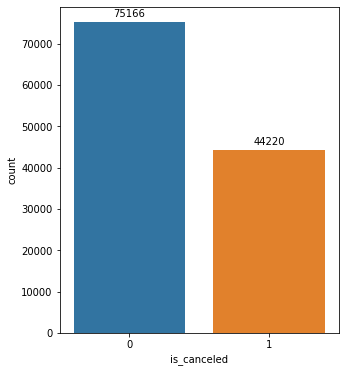

In [ ]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [ ]:
# pisah kolom. y untuk target, x untuk kolom selain target
X = df_clean_new[[col for col in df_clean_new.columns if col not in ['is_canceled']]]
y = pd.DataFrame().assign(is_canceled=df_clean_new['is_canceled'])

In [ ]:
# split data jadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df_clean_new.index, test_size=0.30, random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83570, 50)
(83570, 1)
(35816, 50)
(35816, 1)


In [ ]:
# RUS, ROS, SMOTE dengan package imblearn
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train,y_train)
x_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train,y_train)
#x_smote, y_smote = over_sampling.SMOTE().fit_resample(X_train,y_train) #eror karna ada tipe data object

In [ ]:
# hasil setelah di RUS, ROS
print('Original data train:')
print(y_train.value_counts())
print('Random under-sampling:')
print(y_under.value_counts())
print('Random over-sampling:')
print(y_over.value_counts())

Original data train:
is_canceled
0              52608
1              30962
dtype: int64
Random under-sampling:
is_canceled
0              30962
1              30962
dtype: int64
Random over-sampling:
is_canceled
0              52608
1              52608
dtype: int64


# **2. Feature Engineering**

# **Feature extraction (Add New Features)**


> **Total Stays**
</br>Dari kolom stays_in_weekend_nights dan stays_in_week_nights, kita bisa mendapatkan total jumlah hari menginap. Terlihat data `total stays` bernilai 0, hal ini memungkinkan sebab konsumen dapat check in dan checkout dihari yang sama



In [ ]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,lead_time_norm,stays_in_weekend_nights_norm,stays_in_week_nights_norm,adults_norm,children_norm,babies_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays
0,1,0,342,2015,July,27,1,0,0,2,...,0.464043,0.0,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0
1,1,0,737,2015,July,27,1,0,0,2,...,1.000000,0.0,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0
2,1,0,7,2015,July,27,1,0,1,1,...,0.009498,0.0,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1
3,1,0,13,2015,July,27,1,0,1,1,...,0.017639,0.0,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1
4,1,0,14,2015,July,27,1,0,2,2,...,0.018996,0.0,0.04,0.018519,0.0,0.0,0.192157,0.0,0.2,2



> **Total Guest**
</br>Dari kolom `adults, children and babies` kita bisa mendapatkan total jumlah orang yang menginap



In [ ]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,stays_in_weekend_nights_norm,stays_in_week_nights_norm,adults_norm,children_norm,babies_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests
0,1,0,342,2015,July,27,1,0,0,2,...,0.0,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0,2.0
1,1,0,737,2015,July,27,1,0,0,2,...,0.0,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0,2.0
2,1,0,7,2015,July,27,1,0,1,1,...,0.0,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1,1.0
3,1,0,13,2015,July,27,1,0,1,1,...,0.0,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1,1.0
4,1,0,14,2015,July,27,1,0,2,2,...,0.0,0.04,0.018519,0.0,0.0,0.192157,0.0,0.2,2,2.0



> **Kids**
</br>Dari kolom `children and babies` kita bisa mendapatkan total jumlah anak yang menginap. Karena biasanya hanya ada kategori tamu dewasa dan anak (dibawah 17 tahun) dalam pemesanan kamar hotel



In [ ]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,stays_in_week_nights_norm,adults_norm,children_norm,babies_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests,kids
0,1,0,342,2015,July,27,1,0,0,2,...,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0,2.0,0.0
1,1,0,737,2015,July,27,1,0,0,2,...,0.00,0.018519,0.0,0.0,0.000000,0.0,0.0,0,2.0,0.0
2,1,0,7,2015,July,27,1,0,1,1,...,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1,1.0,0.0
3,1,0,13,2015,July,27,1,0,1,1,...,0.02,0.000000,0.0,0.0,0.147059,0.0,0.0,1,1.0,0.0
4,1,0,14,2015,July,27,1,0,2,2,...,0.04,0.018519,0.0,0.0,0.192157,0.0,0.2,2,2.0,0.0


> **Guest Location**
</br>Karena kolom `country` memiliki data yang sangat besar, maka akan dikategorikan menjadi local & international. Pengkategorian mengacu pada lokasi hotel pada dataset yang berada di negara Portugal untuk penduduk local dan selain itu akan di kategorikan sebagai international

In [ ]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

International    70068
Local            48913
Name: guest_location, dtype: int64

> **Arrival Columns**
</br>Dari kolom ini akan digenerate kolom baru berdasrkan bulan dan hari 

In [ ]:
# Getting bookin Arrival date as Date time object 

df_clean['arrival_date'] = df_clean['arrival_date_year'].astype(str) + '-' + df_clean['arrival_date_month'] + '-' + df_clean['arrival_date_day_of_month'].astype(str)
df_clean['arrival_date'] = pd.to_datetime(df_clean['arrival_date'])

df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,children_norm,babies_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests,kids,guest_location,arrival_date
0,1,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01
3,1,0,13,2015,July,27,1,0,1,1,...,0.0,0.0,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01
4,1,0,14,2015,July,27,1,0,2,2,...,0.0,0.0,0.192157,0.0,0.2,2,2.0,0.0,International,2015-07-01


In [ ]:
# Arrival month 

df_clean['arrival_month'] = df_clean['arrival_date'].dt.month
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests,kids,guest_location,arrival_date,arrival_month
0,1,0,342,2015,July,27,1,0,0,2,...,0.0,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7
1,1,0,737,2015,July,27,1,0,0,2,...,0.0,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7
2,1,0,7,2015,July,27,1,0,1,1,...,0.0,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01,7
3,1,0,13,2015,July,27,1,0,1,1,...,0.0,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01,7
4,1,0,14,2015,July,27,1,0,2,2,...,0.0,0.192157,0.0,0.2,2,2.0,0.0,International,2015-07-01,7


In [ ]:
# Arrival day

df_clean['arrival_day'] = df_clean['arrival_date'].dt.day_name()
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests,kids,guest_location,arrival_date,arrival_month,arrival_day
0,1,0,342,2015,July,27,1,0,0,2,...,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7,Wednesday
1,1,0,737,2015,July,27,1,0,0,2,...,0.000000,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7,Wednesday
2,1,0,7,2015,July,27,1,0,1,1,...,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01,7,Wednesday
3,1,0,13,2015,July,27,1,0,1,1,...,0.147059,0.0,0.0,1,1.0,0.0,International,2015-07-01,7,Wednesday
4,1,0,14,2015,July,27,1,0,2,2,...,0.192157,0.0,0.2,2,2.0,0.0,International,2015-07-01,7,Wednesday


In [ ]:
# Arrival month year

df_clean['month_year'] = pd.to_datetime(df_clean['arrival_date']).dt.to_period('M')
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays,total_guests,kids,guest_location,arrival_date,arrival_month,arrival_day,month_year
0,1,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7,Wednesday,2015-07
1,1,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,2.0,0.0,Local,2015-07-01,7,Wednesday,2015-07
2,1,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,1,1.0,0.0,International,2015-07-01,7,Wednesday,2015-07
3,1,0,13,2015,July,27,1,0,1,1,...,0.0,0.0,1,1.0,0.0,International,2015-07-01,7,Wednesday,2015-07
4,1,0,14,2015,July,27,1,0,2,2,...,0.0,0.2,2,2.0,0.0,International,2015-07-01,7,Wednesday,2015-07


> **Meal Columns**
</br>Dari kolom ini didapat data bernilai 'undentified'. Dari source dataset ini menyebutkan bahwa undentified sama dengan SC (no meal package), untuk itu kami akan mengganti nilai undentified menjadi SC

In [ ]:
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_clean['meal'].value_counts()

BB           92014
HB           14454
SC           10546
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df_clean['meal'] = df_clean['meal'].str.replace('Undefined', 'SC')
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

> **Distribution Channel**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi TA/TO yang merupakan nilai modus

In [ ]:
df_clean['distribution_channel'].value_counts()

TA/TO        97559
Direct       14577
Corporate     6651
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

In [ ]:
df_clean['distribution_channel'] =  df_clean['distribution_channel'].str.replace('Undefined', 'TA/TO')
df_clean['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

> **Market Segment**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi online TA yang merupakan modus

In [ ]:
df_clean['market_segment'].value_counts()

Online TA        56220
Offline TA/TO    24178
Groups           19790
Direct           12552
Corporate         5282
Complementary      724
Aviation           235
Name: market_segment, dtype: int64

In [ ]:
df_clean['market_segment'] = df_clean['market_segment'].replace('Undefined', 'Online TA')
df_clean['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

# **Feature selection (Remove Irrelevant Features)**

In [ ]:
df_clean[['name', 'email', 'phone-number', 'credit_card']].head()

,name,email,phone-number,credit_card
0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
#Delete 'name', 'email', 'phone-number', 'credit_card' attributes
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)


Kolom `name, email, phone-number, credit_card` adalah kolom yang tidak memiliki pola, jadi kita dapat menghapus kolom tersebut

# **Feature selection (Remove Redundant Column)**

In [ ]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', & 'babies'
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies'], axis = 1, inplace=True)


*   Kolom `stays_in_weekend_nights` dan `stays_in_week_nights` dihapus karena sudah ada kolom `total_stays`
*   Kolom `children` dan `babies` dihapus karena sudah ada kolom `kids`

Apakah kolom yang sudah di transformasi bisa ikut dihapus?

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118981 entries, 0 to 119389
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   hotel                             118981 non-null  int64         
 1   is_canceled                       118981 non-null  int64         
 2   lead_time                         118981 non-null  int64         
 3   arrival_date_year                 118981 non-null  int64         
 4   arrival_date_month                118981 non-null  object        
 5   arrival_date_week_number          118981 non-null  int64         
 6   arrival_date_day_of_month         118981 non-null  int64         
 7   adults                            118981 non-null  int64         
 8   meal                              118981 non-null  object        
 9   country                           118981 non-null  object        
 10  market_segment                  

# **Feature Tambahan**

*   Creating two dataframes, Split data Resort Hotel & City Hotel
*   Creating new feature: `Weekday vs Weekend` 
*   Creating new feature: `Summer vs Winter` a




*  **Customer Satisfaction Rate (Rating)**: 
Fitur ini perlu ditambahkan karena dapat digunakan untuk menilai kinerja pelayanan hotel dan mungkin saja berpengaruh terhadap cancellation rate. Hipotesis dari kami adalah semakin tinggi rating yang diberikan kepada hotel, maka akan semakin rendah cancellation rate.
*  **Total Revenue:** Pada Dataset hanya disajikan data mengenai Average Daily Rate (ADR), yang didapatkan dari pendapatan kamar/kamar terisi. Fitur ini belum belum menggambarkan pengeluaran tiap customer per order. Total Revenue dapat digunakan untuk menganalisis efektifivitas pricing yang telah ditetapkan dan mungkin mungkin saja berpengaruh terhadap cancellation rate. 

*  **Reason For Staying:** Alasan seseorang melakukan pemesanan hotel diantaranya adalah Business Trip atau Holiday. Dengan mengetahui alasan tersebut, kedepannya dapat dibuat Marketing Campaign dengan bekerja sama dengan sebuah perusahaan atau tempat wisata di daerah setempat. Selain itu, kita juga akan mengetahui hubungan antara Reason For Staying dan Cancellation rate di hotel tersebut. 
*  **Reason For Cancelled:** Alasan seseorang melakukan pembatalan reservation hotel diantaranya adalah Change Mind, Find Better Hotel, Weather Issue, dan lain sebagainya. Faktor alasan pembatalan yang dikarenakan alasan pribadi customer dapat dimaklumi, namun jika alasan pembatalan karena find better hotel, diperlukan evaluasi kinerja ataupun fasilitas dari hotel tersebut dibandingkan dengan hotel competitor sekitar.

*  **Promotion Apply:** Dengan adanya fitur ini, dapat diketahui efektifitas promosi yang sedang dijalankan, sekaligus mengetahui apakah customer yang order dengan menggunakan promo, kemungkinan cancel nya akan lebih tinggi atau rendah. 





